In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Universo de activos actualizado
tickers = [
    "AAPL", "MSFT", "JPM", "XOM", "TSLA", "PG",       # USA
    "NESN.SW", "SAP.DE", "SAN.MC", "ASML.AS",         # Europa
    "TLT", "BND", "IEF",                              # Bonos
    "GLD", "BTC-USD",                                 # Oro y Bitcoin
    "SPY"                                             # Benchmark
]

# ✅ Cartera conservadora-moderada
weights_conserv = {
    "AAPL": 0.05, "MSFT": 0.10, "JPM": 0.10, "XOM": 0.00, "TSLA": 0.05,
    "PG": 0.10, "NESN.SW": 0.10, "SAP.DE": 0.05, "SAN.MC": 0.05, "ASML.AS": 0.00,
    "TLT": 0.05, "BND": 0.10, "IEF": 0.10,
    "GLD": 0.10, "BTC-USD": 0.05
}

# 🚀 Cartera agresiva
weights_aggr = {
    "AAPL": 0.22,
    "MSFT": 0.15,
    "JPM": 0.00,
    "XOM": 0.05,
    "TSLA": 0.20,
    "PG": 0.05,
    "NESN.SW": 0.025,
    "SAP.DE": 0.05,
    "SAN.MC": 0.05,
    "ASML.AS": 0.15,
    "TLT": 0.00,
    "BND": 0.025,
    "IEF": 0.025,
    "GLD": 0.025,
    "BTC-USD": 0.05
}

In [8]:
# Descargar precios (columna "Close" porque ya viene ajustada en yfinance)
data = yf.download(tickers, start="2022-01-01", end="2025-09-23")["Close"]

# Retornos diarios
returns = data.pct_change().dropna()

# Comprobación: mostrar primeras filas
print(returns.head())

C:\Users\adrip\AppData\Local\Temp\ipykernel_10724\1463957242.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2022-01-01", end="2025-09-23")["Close"]
[*********************100%***********************]  16 of 16 completed

Ticker          AAPL   ASML.AS       BND   BTC-USD       GLD       IEF  \
Date                                                                     
2022-01-04 -0.012692 -0.029072 -0.000119 -0.012066  0.007367 -0.000527   
2022-01-05 -0.026600 -0.015265 -0.003445 -0.050734 -0.003008 -0.004215   
2022-01-06 -0.016693 -0.018483 -0.001073 -0.009366 -0.012244 -0.002469   
2022-01-07  0.000988  0.009719 -0.002745 -0.037141  0.004551 -0.003271   
2022-01-08  0.000000  0.000000  0.000000  0.004236  0.000000  0.000000   

Ticker           JPM      MSFT   NESN.SW        PG    SAN.MC    SAP.DE  \
Date                                                                     
2022-01-04  0.037910 -0.017147  0.002167  0.003499  0.027792  0.001127   
2022-01-05 -0.018282 -0.038388 -0.027027  0.004527  0.001649  0.003538   
2022-01-06  0.010624 -0.007902 -0.002222 -0.008404  0.015803 -0.023073   
2022-01-07  0.009908  0.000510 -0.010022 -0.000553  0.008751 -0.005413   
2022-01-08  0.000000  0.000000  0.000


C:\Users\adrip\AppData\Local\Temp\ipykernel_10724\1463957242.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


In [9]:
# Convertimos pesos a Series
w_conserv = pd.Series(weights_conserv)
w_aggr = pd.Series(weights_aggr)

# Rentabilidad diaria de cada cartera
port_ret_conserv = returns[w_conserv.index].dot(w_conserv)
port_ret_aggr = returns[w_aggr.index].dot(w_aggr)

# Evolución desde $1000
initial = 1000
value_conserv = (1 + port_ret_conserv).cumprod() * initial
value_aggr = (1 + port_ret_aggr).cumprod() * initial
value_spy = (1 + returns["SPY"]).cumprod() * initial

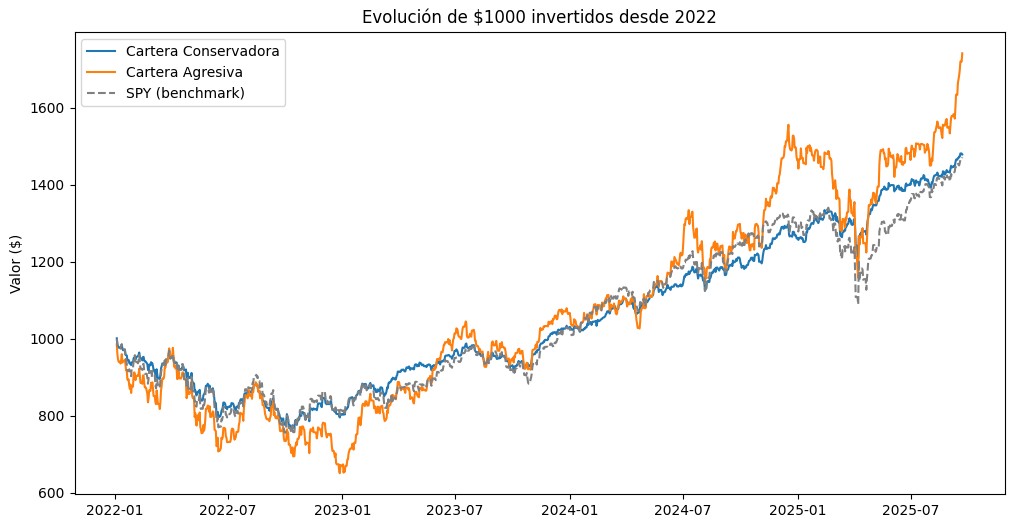

In [10]:
plt.figure(figsize=(12,6))
plt.plot(value_conserv, label="Cartera Conservadora")
plt.plot(value_aggr, label="Cartera Agresiva")
plt.plot(value_spy, label="SPY (benchmark)", linestyle="--", color="grey")
plt.title("Evolución de $1000 invertidos desde 2022")
plt.ylabel("Valor ($)")
plt.legend()
plt.show()

In [11]:
# Rentabilidad acumulada
print("Rentabilidad conservadora: {:.2%}".format(value_conserv[-1]/initial - 1))
print("Rentabilidad agresiva: {:.2%}".format(value_aggr[-1]/initial - 1))
print("Rentabilidad SPY: {:.2%}".format(value_spy[-1]/initial - 1))

# Beta function
def beta_calc(portfolio_returns, market):
    cov = np.cov(portfolio_returns, market)[0][1]
    var_m = np.var(market)
    return cov / var_m

market = returns["SPY"]
beta_conserv = beta_calc(port_ret_conserv, market)
beta_aggr = beta_calc(port_ret_aggr, market)

print("Beta cartera conservadora: {:.2f}".format(beta_conserv))
print("Beta cartera agresiva: {:.2f}".format(beta_aggr))

Rentabilidad conservadora: 47.87%
Rentabilidad agresiva: 74.19%
Rentabilidad SPY: 47.14%
Beta cartera conservadora: 0.53
Beta cartera agresiva: 1.13


C:\Users\adrip\AppData\Local\Temp\ipykernel_10724\331607411.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Rentabilidad conservadora: {:.2%}".format(value_conserv[-1]/initial - 1))
C:\Users\adrip\AppData\Local\Temp\ipykernel_10724\331607411.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Rentabilidad agresiva: {:.2%}".format(value_aggr[-1]/initial - 1))
C:\Users\adrip\AppData\Local\Temp\ipykernel_10724\331607411.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

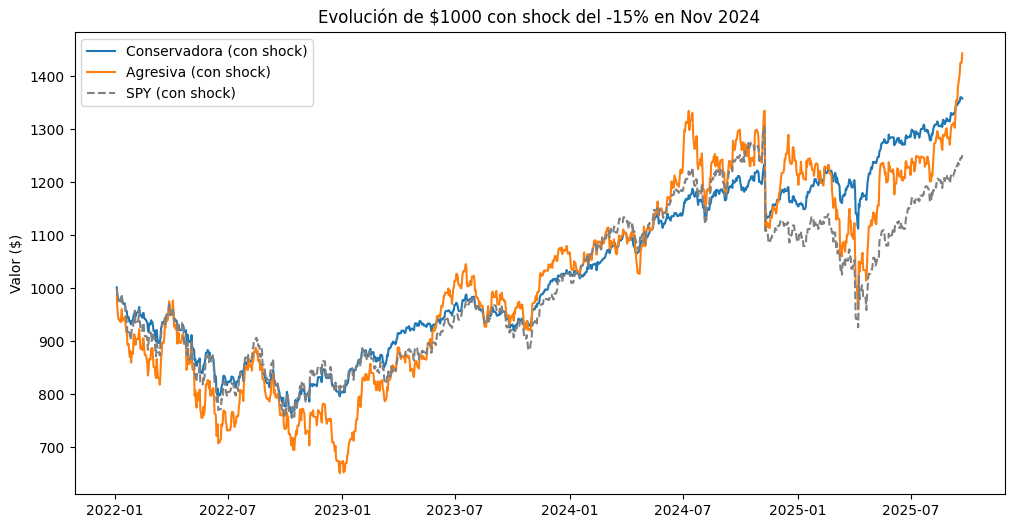

In [12]:
# Elegimos fecha del shock
shock_date = "2024-11-10"

# Copiamos retornos originales
ret_spy_shock = returns["SPY"].copy()
ret_cons_shock = port_ret_conserv.copy()
ret_aggr_shock = port_ret_aggr.copy()

# Aplicamos shocks
ret_spy_shock.loc[shock_date] = -0.15
ret_cons_shock.loc[shock_date] = -0.15 * beta_conserv
ret_aggr_shock.loc[shock_date] = -0.15 * beta_aggr

# Recalculamos trayectorias acumuladas desde 2022
value_spy_shock = (1 + ret_spy_shock).cumprod() * initial
value_cons_shock = (1 + ret_cons_shock).cumprod() * initial
value_aggr_shock = (1 + ret_aggr_shock).cumprod() * initial

# Graficar comparación
plt.figure(figsize=(12,6))
plt.plot(value_cons_shock, label="Conservadora (con shock)")
plt.plot(value_aggr_shock, label="Agresiva (con shock)")
plt.plot(value_spy_shock, label="SPY (con shock)", linestyle="--", color="grey")
plt.title("Evolución de $1000 con shock del -15% en Nov 2024")
plt.ylabel("Valor ($)")
plt.legend()
plt.show()

In [14]:
# --- Calcular valor pre-shock ---
pre_spy = value_spy_shock.loc[:shock_date].iloc[-2]      # último valor antes del shock
pre_cons = value_cons_shock.loc[:shock_date].iloc[-2]
pre_aggr = value_aggr_shock.loc[:shock_date].iloc[-2]

# --- Función para calcular tiempo de recuperación ---
def recovery_time(series, pre_value, shock_date):
    post = series.loc[shock_date:]   # valores desde el shock
    recovered = post[post >= pre_value]  # primer día >= valor pre-shock
    if not recovered.empty:
        recovery_day = recovered.index[0]
        return (recovery_day - pd.to_datetime(shock_date)).days
    else:
        return None   # no recupera en el periodo

# --- Calcular para cada serie ---
rec_spy = recovery_time(value_spy_shock, pre_spy, shock_date)
rec_cons = recovery_time(value_cons_shock, pre_cons, shock_date)
rec_aggr = recovery_time(value_aggr_shock, pre_aggr, shock_date)

print(f"Tiempo recuperación SPY: {rec_spy} días")
print(f"Tiempo recuperación Conservadora: {rec_cons} días")
print(f"Tiempo recuperación Agresiva: {rec_aggr} días")

Tiempo recuperación SPY: None días
Tiempo recuperación Conservadora: 173 días
Tiempo recuperación Agresiva: 306 días


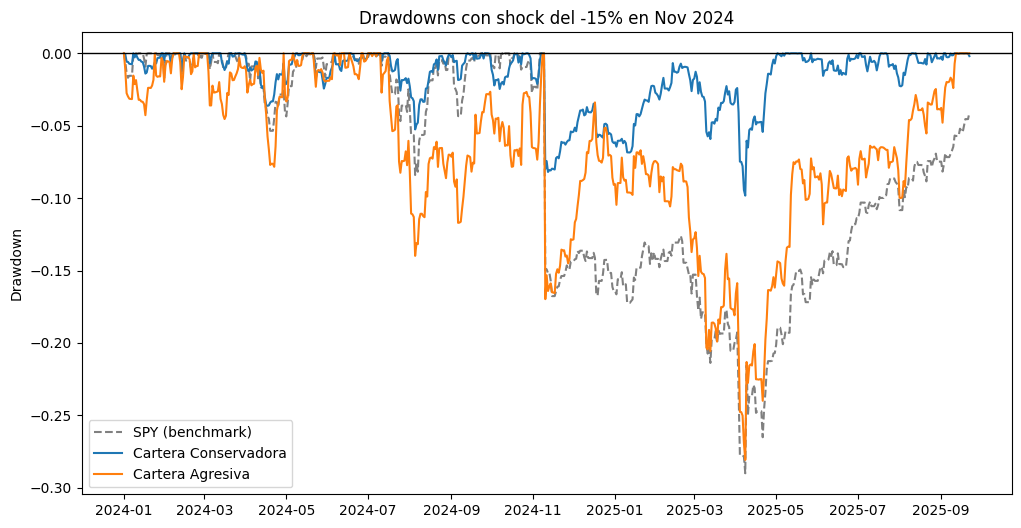

In [15]:
# --- Función de drawdown ---
def compute_drawdown(series):
    cummax = series.cummax()
    drawdown = (series - cummax) / cummax
    return drawdown

# --- Calcular drawdowns para el periodo 2024-01-01 a 2025-09-23 ---
start_view = "2024-01-01"
end_view = "2025-09-23"

dd_spy = compute_(value_spy_shock.loc[start_view:end_view])
dd_cons = compute_drawdown(value_cons_shock.loc[start_view:end_view])
dd_aggr = compute_drawdown(value_aggr_shock.loc[start_view:end_view])

# --- Graficar ---
plt.figure(figsize=(12,6))
plt.plot(dd_spy, label="SPY (benchmark)", linestyle="--", color="grey")
plt.plot(dd_cons, label="Cartera Conservadora")
plt.plot(dd_aggr, label="Cartera Agresiva")
plt.axhline(0, color="black", linewidth=1)
plt.title("Drawdowns con shock del -15% en Nov 2024")
plt.ylabel("Drawdown")
plt.legend()
plt.show()

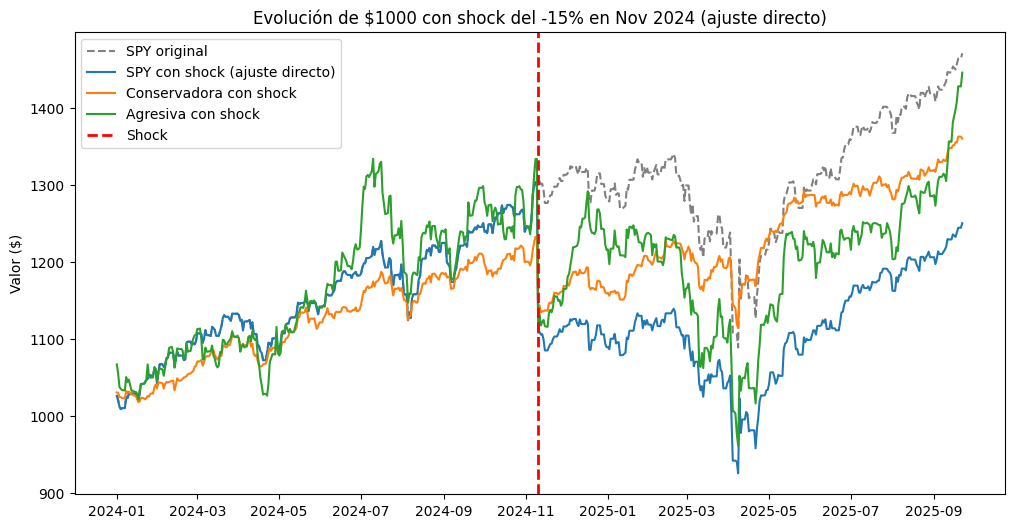

In [21]:
# --- Copiamos las series originales ---
adj_spy = value_spy.copy()
adj_cons = value_conserv.copy()
adj_aggr = value_aggr.copy()

# --- Aplicamos el shock en precios (no en retornos) ---
adj_spy.loc[shock_date:] = adj_spy.loc[shock_date:] * (1 - 0.15)
adj_cons.loc[shock_date:] = adj_cons.loc[shock_date:] * (1 - 0.15 * beta_conserv)
adj_aggr.loc[shock_date:] = adj_aggr.loc[shock_date:] * (1 - 0.15 * beta_aggr)

# --- Graficar comparando escenarios solo en 2024-2025 ---
plt.figure(figsize=(12,6))
plt.plot(value_spy.loc["2024-01-01":"2025-09-23"], 
         label="SPY original", linestyle="--", color="grey")
plt.plot(adj_spy.loc["2024-01-01":"2025-09-23"], 
         label="SPY con shock (ajuste directo)")
plt.plot(adj_cons.loc["2024-01-01":"2025-09-23"], 
         label="Conservadora con shock")
plt.plot(adj_aggr.loc["2024-01-01":"2025-09-23"], 
         label="Agresiva con shock")
# --- Línea vertical en la fecha del shock ---
plt.axvline(pd.to_datetime("2024-11-10"), color="red", linestyle="--", linewidth=2, label="Shock")
plt.title("Evolución de $1000 con shock del -15% en Nov 2024 (ajuste directo)")
plt.ylabel("Valor ($)")
plt.legend()
plt.show()

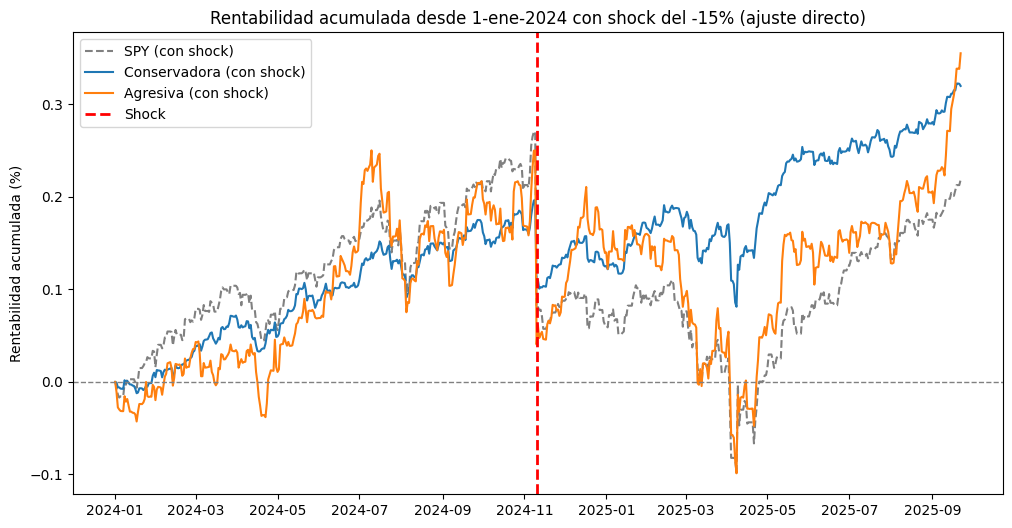

In [22]:
# --- Fecha de inicio para calcular rentabilidades ---
start_return = "2024-01-01"
end_return = "2025-09-23"

# --- Reescalar series al valor inicial en 1-ene-2024 ---
base_spy = adj_spy.loc[start_return]
base_cons = adj_cons.loc[start_return]
base_aggr = adj_aggr.loc[start_return]

ret_spy_2024 = adj_spy.loc[start_return:end_return] / base_spy - 1
ret_cons_2024 = adj_cons.loc[start_return:end_return] / base_cons - 1
ret_aggr_2024 = adj_aggr.loc[start_return:end_return] / base_aggr - 1

# --- Graficar ---
plt.figure(figsize=(12,6))
plt.plot(ret_spy_2024.index, ret_spy_2024, label="SPY (con shock)", linestyle="--", color="grey")
plt.plot(ret_cons_2024.index, ret_cons_2024, label="Conservadora (con shock)")
plt.plot(ret_aggr_2024.index, ret_aggr_2024, label="Agresiva (con shock)")

# Línea horizontal en 0%
plt.axhline(0, color="grey", linestyle="--", linewidth=1)

# Línea vertical en la fecha del shock
plt.axvline(pd.to_datetime("2024-11-10"), color="red", linestyle="--", linewidth=2, label="Shock")

plt.title("Rentabilidad acumulada desde 1-ene-2024 con shock del -15% (ajuste directo)")
plt.ylabel("Rentabilidad acumulada (%)")
plt.legend()
plt.show()

In [23]:
# --- Retornos diarios de la cartera agresiva ---
returns_aggr = port_ret_aggr  # ya lo tenemos calculado de antes

# --- Calcular el VaR histórico al 95% ---
var_95 = np.percentile(returns_aggr, 5)  # percentil 5

print("VaR histórico (95%): {:.2%}".format(var_95))

VaR histórico (95%): -2.04%


In [24]:
# Media y desviación estándar diaria de retornos
mu = returns_aggr.mean()
sigma = returns_aggr.std(ddof=1)

# Valor crítico z para 95% unilateral
z_95 = 1.645

# VaR paramétrico
var_param_95 = mu - z_95 * sigma

print("VaR paramétrico (95%): {:.2%}".format(var_param_95))

VaR paramétrico (95%): -2.07%


In [25]:
import numpy as np

# --- VaR histórico ya lo tienes como var_95 ---
# CVaR histórico (Expected Shortfall)
cvar_hist_95 = returns_aggr[returns_aggr <= var_95].mean()
print("CVaR histórico (95%): {:.2%}".format(cvar_hist_95))

# --- Paramétrico (normal) ---
mu = returns_aggr.mean()
sigma = returns_aggr.std(ddof=1)

z05 = -1.6448536269514729
phi = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * z05**2)

cvar_param_95 = mu - sigma * (phi / 0.05)
print("CVaR paramétrico (95%): {:.2%}".format(cvar_param_95))

CVaR histórico (95%): -3.05%
CVaR paramétrico (95%): -2.60%


In [26]:
alpha = 0.95
var_cut = var_95  # tu VaR histórico al 95% (percentil 5)

# 1) Violaciones
violations = (returns_aggr < var_cut).sum()
n = returns_aggr.size
hit_ratio = violations / n

print(f"Días totales: {n}")
print(f"Violaciones observadas: {violations}")
print(f"Frecuencia de violación: {hit_ratio:.2%} (esperado ≈ {(1-alpha):.2%})")

Días totales: 1358
Violaciones observadas: 68
Frecuencia de violación: 5.01% (esperado ≈ 5.00%)


In [31]:
import yfinance as yf
import pandas as pd
import numpy as np

# ---------- Configuración ----------
start = "2022-01-01"
end   = "2025-09-23"

tickers = [
    "AAPL","MSFT","JPM","XOM","TSLA",
    "PG","NESN.SW","SAP.DE","SAN.MC","ASML.AS",
    "TLT","BND","IEF",
    "GLD","BTC-USD","SPY"
]

# Descargar todos los precios con auto_adjust=True
data = yf.download(tickers, start=start, end=end, auto_adjust=True)

# Nos quedamos con 'Close' y renombramos columnas (un nivel plano)
adj_close = data["Close"].copy()
adj_close.columns.name = None  # elimina el nombre de nivel

# ---------- Retornos diarios ----------
asset_returns = adj_close.pct_change().dropna()

[*********************100%***********************]  16 of 16 completed
C:\Users\adrip\AppData\Local\Temp\ipykernel_10724\13817774.py:24: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  asset_returns = adj_close.pct_change().dropna()


In [32]:
# Pesos CONSERVADORA (los tuyos con BTC y menos bonos/commodities)
weights_cons = {
    "AAPL": 0.05, "MSFT": 0.10, "JPM": 0.10, "XOM": 0.00, "TSLA": 0.05,
    "PG": 0.10, "NESN.SW": 0.10, "SAP.DE": 0.05, "SAN.MC": 0.05, "ASML.AS": 0.00,
    "TLT": 0.05, "BND": 0.10, "IEF": 0.10,
    "GLD": 0.10, "BTC-USD": 0.05
}

# Pesos AGRESIVA (tu versión “buena” beta≈1.13)
weights_aggr = {
    "AAPL": 0.22, "MSFT": 0.15, "JPM": 0.00, "XOM": 0.05, "TSLA": 0.20,
    "PG": 0.05, "NESN.SW": 0.025, "SAP.DE": 0.05, "SAN.MC": 0.05, "ASML.AS": 0.15,
    "TLT": 0.00, "BND": 0.025, "IEF": 0.025,
    "GLD": 0.025, "BTC-USD": 0.05
}

In [33]:
returns_cons = (asset_returns[list(weights_cons.keys())] * pd.Series(weights_cons)).sum(axis=1)
returns_aggr = (asset_returns[list(weights_aggr.keys())] * pd.Series(weights_aggr)).sum(axis=1)

In [34]:
# --- VaR histórico ---
var95_cons_hist = np.percentile(returns_cons, 5)

# --- CVaR histórico ---
cvar95_cons_hist = returns_cons[returns_cons <= var95_cons_hist].mean()

# --- VaR paramétrico ---
mu_c, sigma_c = returns_cons.mean(), returns_cons.std(ddof=1)
z_95 = -1.645
var95_cons_param = mu_c + z_95 * sigma_c

# --- CVaR paramétrico ---
phi = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * z_95**2)
cvar95_cons_param = mu_c - sigma_c * (phi / 0.05)

print("Conservadora - VaR histórico 95%:", "{:.2%}".format(var95_cons_hist))
print("Conservadora - CVaR histórico 95%:", "{:.2%}".format(cvar95_cons_hist))
print("Conservadora - VaR paramétrico 95%:", "{:.2%}".format(var95_cons_param))
print("Conservadora - CVaR paramétrico 95%:", "{:.2%}".format(cvar95_cons_param))

Conservadora - VaR histórico 95%: -0.89%
Conservadora - CVaR histórico 95%: -1.45%
Conservadora - VaR paramétrico 95%: -0.96%
Conservadora - CVaR paramétrico 95%: -1.21%


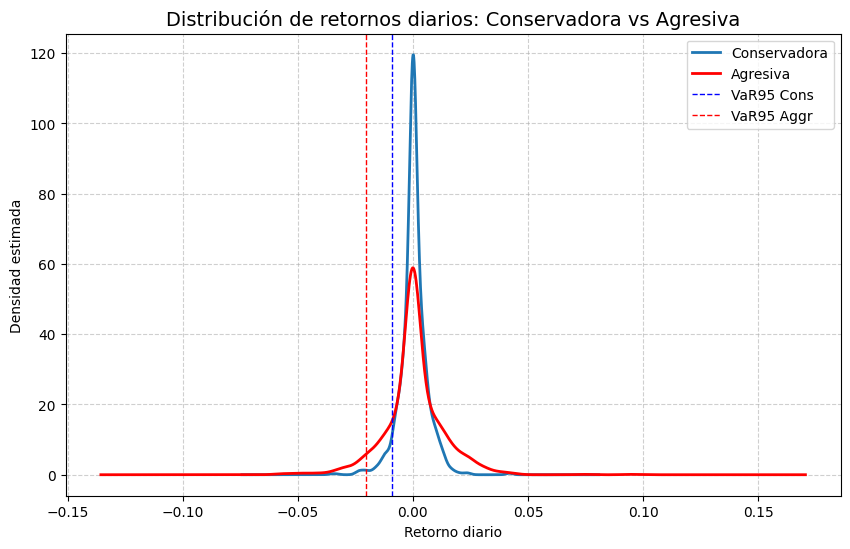

In [36]:
import matplotlib.pyplot as plt

# --- Datos de retornos (ya definidos antes) ---
# returns_cons = retornos diarios cartera conservadora
# returns_aggr = retornos diarios cartera agresiva

plt.figure(figsize=(10,6))

# Histograma suavizado (densidad)
returns_cons.plot(kind="kde", label="Conservadora", lw=2)
returns_aggr.plot(kind="kde", label="Agresiva", lw=2, color="red")

# Líneas verticales para VaR95 (histórico)
plt.axvline(np.percentile(returns_cons, 5), color="blue", linestyle="--", lw=1, label="VaR95 Cons")
plt.axvline(np.percentile(returns_aggr, 5), color="red", linestyle="--", lw=1, label="VaR95 Aggr")

plt.title("Distribución de retornos diarios: Conservadora vs Agresiva", fontsize=14)
plt.xlabel("Retorno diario")
plt.ylabel("Densidad estimada")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

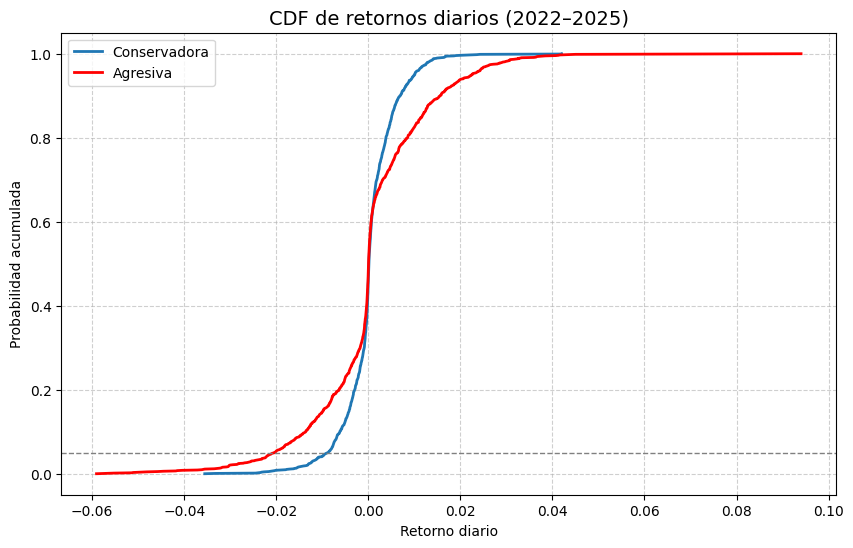

In [37]:
import numpy as np

plt.figure(figsize=(10,6))

# Conservadora
sorted_cons = np.sort(returns_cons)
cdf_cons = np.arange(1, len(sorted_cons)+1) / len(sorted_cons)
plt.plot(sorted_cons, cdf_cons, label="Conservadora", lw=2)

# Agresiva
sorted_aggr = np.sort(returns_aggr)
cdf_aggr = np.arange(1, len(sorted_aggr)+1) / len(sorted_aggr)
plt.plot(sorted_aggr, cdf_aggr, label="Agresiva", lw=2, color="red")

# Línea horizontal 5% (VaR95)
plt.axhline(0.05, color="gray", linestyle="--", lw=1)
plt.title("CDF de retornos diarios (2022–2025)", fontsize=14)
plt.xlabel("Retorno diario")
plt.ylabel("Probabilidad acumulada")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()